In [1]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pykitti
import os
from pathlib import Path
from matplotlib import pyplot as plt
from src.vo import VO

In [2]:
def extract_features(frame):
    global orb
    if orb is None:
        orb = cv2.ORB_create()
    return cv2.goodFeaturesToTrack(frame,256,0.01,10)

In [22]:
def show_features(frame, features):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    
    for i in features:
        x,y = i.pt
        cv2.circle(frame_rgb,(int(x),int(y)),5,255,-1)
    
    return frame_rgb

In [23]:
root = Path('sample')
drive = '00'

seq_path = root / 'data_odometry_gray' / 'dataset' / drive / 'image_0'
frames = sorted(os.listdir(seq_path))
vo = VO()

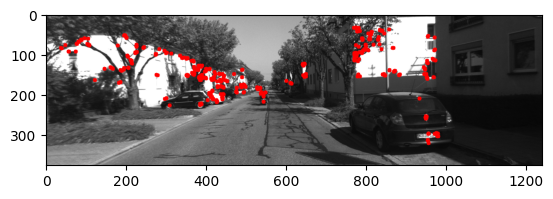

In [38]:


vo.append(cv2.imread(str(seq_path / frames[0]), cv2.IMREAD_UNCHANGED))
vo.append(cv2.imread(str(seq_path / frames[1]), cv2.IMREAD_UNCHANGED))

plt.imshow(show_features(vo.frames[-1], vo.keypoints[-1]))
plt.show()

In [36]:
cv2.drawMatches(
    vo.frames[-2], vo.keypoints[-2],
    vo.frames[-1], vo.keypoints[-1],
    matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])